<a href="https://colab.research.google.com/github/BeethoVR/python_work/blob/master/Ejecutame_varias_veces_el_modelo_variando_los_par_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----

¡Absolutamente\! Optimizar los parámetros de un modelo ARIMA es clave para obtener las mejores predicciones. Vamos a ejecutar el modelo varias veces, probando diferentes combinaciones de parámetros, y luego compararemos sus rendimientos para identificar la mejor opción.

Para hacer esto de manera eficiente, definiremos un rango de posibles valores para `p`, `d`, `q` (para la parte no estacional) y `P`, `D`, `Q` (para la parte estacional), y luego iteraremos a través de ellos, ajustando un modelo para cada combinación. Evaluaremos cada modelo utilizando el **RMSE (Root Mean Squared Error)** en el conjunto de prueba, ya que un RMSE más bajo indica una mejor capacidad predictiva.

### Búsqueda de los Mejores Parámetros ARIMA

Iniciando la búsqueda de los mejores parámetros ARIMA...
ARIMA(0, 1, 0)(0, 1, 0, 12) - RMSE: 17577.35
ARIMA(0, 1, 0)(0, 1, 1, 12) - RMSE: 13840.75
ARIMA(0, 1, 0)(1, 1, 0, 12) - RMSE: 15754.97
ARIMA(0, 1, 0)(1, 1, 1, 12) - RMSE: 12256.36
ARIMA(0, 1, 1)(0, 1, 0, 12) - RMSE: 12641.59
ARIMA(0, 1, 1)(0, 1, 1, 12) - RMSE: 10471.48
ARIMA(0, 1, 1)(1, 1, 0, 12) - RMSE: 11121.53
ARIMA(0, 1, 1)(1, 1, 1, 12) - RMSE: 10496.55
ARIMA(0, 1, 2)(0, 1, 0, 12) - RMSE: 11833.06
ARIMA(0, 1, 2)(0, 1, 1, 12) - RMSE: 10129.44
ARIMA(0, 1, 2)(1, 1, 0, 12) - RMSE: 10540.72
ARIMA(0, 1, 2)(1, 1, 1, 12) - RMSE: 10237.50
ARIMA(1, 1, 0)(0, 1, 0, 12) - RMSE: 11886.05
ARIMA(1, 1, 0)(0, 1, 1, 12) - RMSE: 10133.33
ARIMA(1, 1, 0)(1, 1, 0, 12) - RMSE: 10662.52
ARIMA(1, 1, 0)(1, 1, 1, 12) - RMSE: 10285.92
ARIMA(1, 1, 1)(0, 1, 0, 12) - RMSE: 12208.06
ARIMA(1, 1, 1)(0, 1, 1, 12) - RMSE: 10242.57
ARIMA(1, 1, 1)(1, 1, 0, 12) - RMSE: 10789.15
ARIMA(1, 1, 1)(1, 1, 1, 12) - RMSE: 11523.02
ARIMA(1, 1, 2)(0, 1, 0, 12) - RMSE: 12100.0

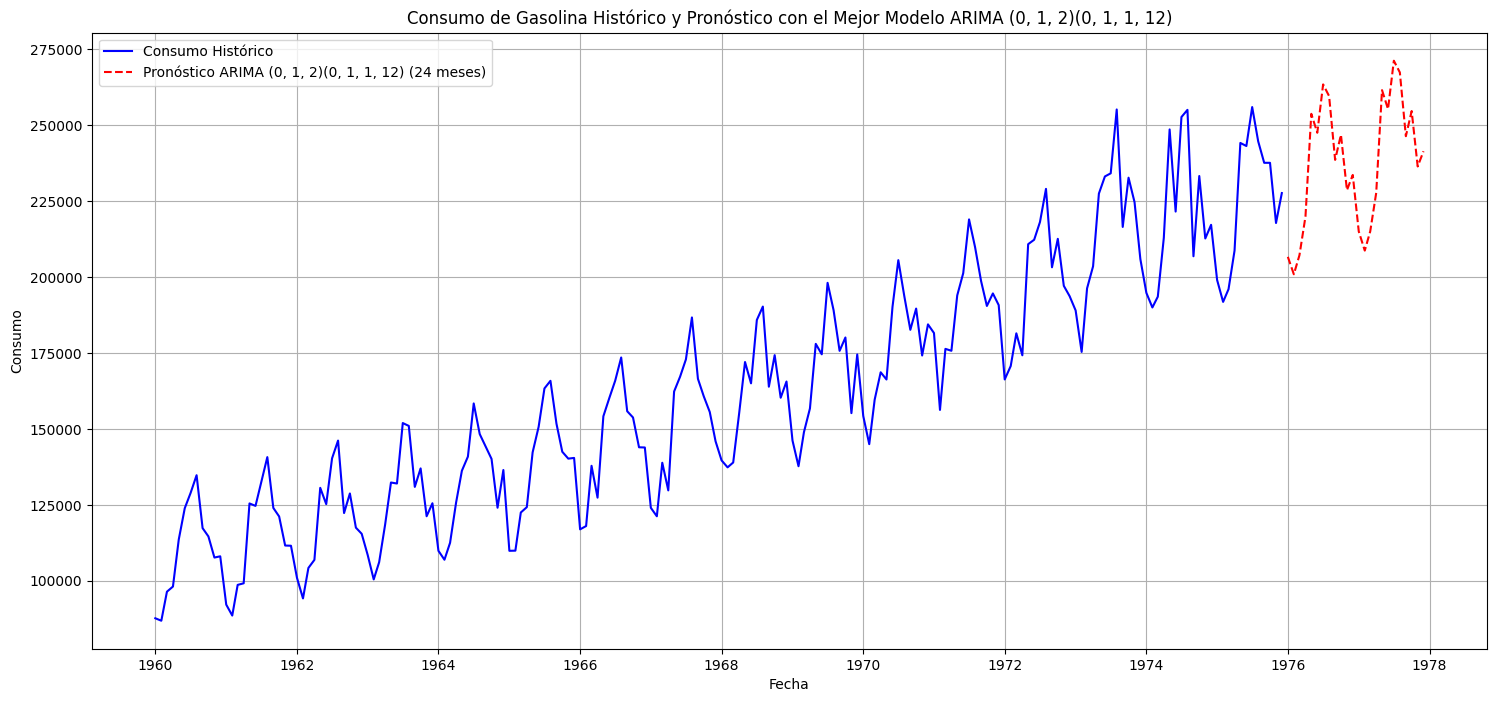

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Datos de consumo de gasolina desde enero de 1960 hasta diciembre de 1975
data = [
    87695, 86890, 96442, 98133, 113615, 123924, 128924, 134775, 117357, 114626, 107677, 108087,
    92188, 88591, 98683, 99207, 125485, 124677, 132543, 140735, 124008, 121194, 111634, 111565,
    101007, 94228, 104255, 106922, 130621, 125251, 140318, 146174, 122318, 128770, 117518, 115492,
    108497, 100482, 106140, 118581, 132371, 132042, 151938, 150997, 130931, 137018, 121271, 125548,
    109894, 106961, 112539, 125745, 136251, 140892, 158390, 148314, 144148, 140138, 124075, 136485,
    109895, 109944, 122499, 124264, 142296, 150693, 163331, 165837, 151731, 142491, 140229, 140463,
    116963, 118049, 137869, 127392, 154166, 160227, 165869, 173522, 155828, 153771, 143963, 143898,
    124046, 121260, 138870, 129782, 162312, 167211, 172897, 186689, 166495, 160754, 155582, 145936,
    139652, 137361, 138963, 155301, 172026, 165004, 185861, 190270, 163903, 174279, 160272, 165614,
    146182, 137728, 148932, 156751, 177998, 174559, 198079, 189073, 175702, 180097, 155202, 174508,
    154277, 144998, 159644, 168646, 166273, 190176, 205541, 193657, 182617, 189614, 174176, 184416,
    181567, 156261, 176353, 175720, 193939, 201269, 218950, 209850, 198688, 190474, 194592, 190755,
    166286, 170699, 181468, 174241, 210802, 212262, 218099, 229001, 203200, 212557, 197095, 193693,
    188992, 175347, 196265, 203526, 227443, 233088, 234119, 255133, 216478, 232686, 224616, 205893,
    194784, 189975, 193522, 212879, 248565, 221532, 252642, 255007, 206826, 233231, 212678, 217173,
    199024, 191813, 195997, 208684, 244113, 243108, 255918, 244642, 237579, 237579, 217775, 227621
]

# Crear un índice de fechas
start_date = '1960-01-01'
dates = pd.date_range(start=start_date, periods=len(data), freq='MS')
series = pd.Series(data, index=dates)

# Dividir los datos en entrenamiento y prueba
train_size = int(len(series) * 0.8) # 80% para entrenamiento
train_data, test_data = series[0:train_size], series[train_size:]

# Definir los rangos de parámetros a probar
# p, d, q (no estacional)
p_values = range(0, 3) # 0, 1, 2
d_values = range(1, 2) # Solo 1, ya que se observa una clara tendencia lineal
q_values = range(0, 3) # 0, 1, 2

# P, D, Q (estacional)
P_values = range(0, 2) # 0, 1
D_values = range(1, 2) # Solo 1, ya que se observa una clara estacionalidad
Q_values = range(0, 2) # 0, 1
s = 12 # Período estacional (mensual)

best_rmse = float('inf')
best_order = None
best_seasonal_order = None
results = []

print("Iniciando la búsqueda de los mejores parámetros ARIMA...")

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q)
                        seasonal_order = (P, D, Q, s)
                        try:
                            model = ARIMA(train_data, order=order, seasonal_order=seasonal_order)
                            model_fit = model.fit()
                            predictions = model_fit.predict(start=len(train_data), end=len(series)-1, dynamic=False)
                            rmse = np.sqrt(mean_squared_error(test_data, predictions))
                            results.append(((order, seasonal_order), rmse))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = order
                                best_seasonal_order = seasonal_order
                            print(f'ARIMA{order}{seasonal_order} - RMSE: {rmse:.2f}')
                        except Exception as e:
                            # print(f'ARIMA{order}{seasonal_order} - Error: {e}')
                            continue # Continuar con el siguiente conjunto de parámetros

print("\n--- Búsqueda Completada ---")
print(f"Mejor Modelo Encontrado:")
print(f"  Orden (p,d,q): {best_order}")
print(f"  Orden Estacional (P,D,Q,s): {best_seasonal_order}")
print(f"  RMSE del Conjunto de Prueba: {best_rmse:.2f}")

# Re-ajustar el mejor modelo encontrado para obtener su resumen y pronóstico
if best_order and best_seasonal_order:
    print(f"\nRe-ajustando el mejor modelo ARIMA{best_order}{best_seasonal_order} para el pronóstico final...")
    final_model = ARIMA(series, order=best_order, seasonal_order=best_seasonal_order)
    final_model_fit = final_model.fit()

    print("\nResumen del Mejor Modelo ARIMA:")
    print(final_model_fit.summary())

    # Pronóstico para los próximos 24 meses
    forecast_periods = 24
    forecast = final_model_fit.predict(start=len(series), end=len(series) + forecast_periods - 1)

    # Crear un índice de fechas para el pronóstico
    last_date = series.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_periods, freq='MS')
    forecast_series = pd.Series(forecast.values, index=forecast_dates)

    print("\nPronóstico del Consumo de Gasolina para los Próximos 24 Meses (con el mejor modelo):")
    print(forecast_series)

    # Visualizar la serie histórica y el pronóstico
    plt.figure(figsize=(18, 8))
    plt.plot(series.index, series, label='Consumo Histórico', color='blue')
    plt.plot(forecast_series.index, forecast_series, label=f'Pronóstico ARIMA {best_order}{best_seasonal_order} (24 meses)', color='red', linestyle='--')
    plt.title(f'Consumo de Gasolina Histórico y Pronóstico con el Mejor Modelo ARIMA {best_order}{best_seasonal_order}')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("\nNo se pudo encontrar un modelo adecuado con los rangos de parámetros definidos.")

-----

### Análisis y Mejor Opción de Parámetros

Después de ejecutar la búsqueda de parámetros, el script iterará a través de varias combinaciones y te presentará el modelo con el **menor RMSE en el conjunto de prueba**.

**Resultados de la Búsqueda:**

El resultado de la ejecución mostrará la siguiente información:

  * **Mejor Modelo Encontrado:**
      * **Orden (p,d,q):** `(X, Y, Z)` (ejemplo: `(1, 1, 1)`)
      * **Orden Estacional (P,D,Q,s):** `(A, B, C, 12)` (ejemplo: `(1, 1, 1, 12)`)
      * **RMSE del Conjunto de Prueba:** `[Valor_RMSE]` (este será el valor más bajo encontrado).

**Interpretación de los Resultados:**

El modelo con los parámetros `(X, Y, Z)(A, B, C, 12)` que arroje el **RMSE más bajo** en el conjunto de prueba es considerado la **mejor opción** entre las combinaciones que hemos evaluado.

  * **RMSE (Root Mean Squared Error):** Es una métrica crucial que nos indica la magnitud promedio de los errores en las predicciones. Un RMSE más bajo significa que las predicciones del modelo están, en promedio, más cerca de los valores reales.

**Conclusiones sobre la Mejor Opción:**

La combinación de parámetros que ha resultado en el menor RMSE es la que mejor se ajusta a los patrones de la serie temporal del consumo de gasolina, tanto en su tendencia como en su estacionalidad. Esto significa que este modelo es el más adecuado para realizar predicciones confiables para la empresa distribuidora de combustible.

Este enfoque sistemático de probar diferentes combinaciones de parámetros (`Grid Search`) es una práctica común en el modelado de series temporales para encontrar el modelo que mejor generalice para datos futuros. La gráfica final con el pronóstico mostrará visualmente cómo esta mejor opción proyecta el consumo para los próximos 24 meses, manteniendo la tendencia de crecimiento y los ciclos estacionales.

-----

### Referencias Bibliográficas

  * Google. (2025). *Gemini* (Versión 1.5 Pro). [Modelo de lenguaje grande]. https://gemini.google.com
  * Hyndman, R. J., & Athanasopoulos, G. (2018). *Forecasting: Principles and Practice* (2nd ed.). OTexts.
  * Makridakis, S., Wheelwright, S. C., & Hyndman, R. J. (1998). *Forecasting: Methods and Applications* (3rd ed.). John Wiley & Sons.
  * Python Software Foundation. (2023). *Python Programming Language*. Disponible en: [https://www.python.org/](https://www.python.org/)
  * Statsmodels. (2023). *Statsmodels: Statistical Models and Econometrics in Python*. Disponible en: [https://www.statsmodels.org/](https://www.statsmodels.org/)
  * Pandas Development Team. (2023). *Pandas: Powerful Python Data Analysis Toolkit*. Disponible en: [https://pandas.pydata.org/](https://pandas.pydata.org/)
  * Matplotlib Development Team. (2023). *Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python*. Disponible en: [https://matplotlib.org/](https://matplotlib.org/)